<a href="https://colab.research.google.com/github/merttguney/AI_106/blob/main/AI106_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas Gruplama

In [5]:
import pandas as pd

In [6]:
sensor_data = pd.read_csv("sensor.csv")
sensor_data

,interval,sensor,axis,reading
0,0,accel,Z,0.0
1,0,accel,Y,0.5
2,0,accel,X,1.0
3,1,accel,Z,0.1
4,1,accel,Y,0.4
5,1,accel,X,0.9
6,2,accel,Z,0.2
7,2,accel,Y,0.3
8,2,accel,X,0.8
9,3,accel,Z,0.3


In [9]:
sensor_grubu = sensor_data.groupby('sensor')
sensor_grubu

In [10]:
sensor_grubu.describe().T

sensor              accel  orientation
interval count  12.000000    12.000000
         mean    1.500000     1.500000
         std     1.167748     1.167748
         min     0.000000     0.000000
         25%     0.750000     0.750000
         50%     1.500000     1.500000
         75%     2.250000     2.250000
         max     3.000000     3.000000
reading  count  12.000000    12.000000
         mean    0.450000     0.133333
         std     0.328910     0.143548
         min     0.000000     0.000000
         25%     0.200000     0.000000
         50%     0.350000     0.100000
         75%     0.725000     0.225000
         max     1.000000     0.400000

In [11]:
sensor_grubu.get_group("accel")

,interval,sensor,axis,reading
0,0,accel,Z,0.0
1,0,accel,Y,0.5
2,0,accel,X,1.0
3,1,accel,Z,0.1
4,1,accel,Y,0.4
5,1,accel,X,0.9
6,2,accel,Z,0.2
7,2,accel,Y,0.3
8,2,accel,X,0.8
9,3,accel,Z,0.3


In [12]:
sensor_grubu.get_group("orientation")

,interval,sensor,axis,reading
12,0,orientation,Z,0.0
13,0,orientation,Y,0.1
14,0,orientation,X,0.0
15,1,orientation,Z,0.0
16,1,orientation,Y,0.2
17,1,orientation,X,0.1
18,2,orientation,Z,0.0
19,2,orientation,Y,0.3
20,2,orientation,X,0.2
21,3,orientation,Z,0.0


In [13]:
sensor_grubu.get_group("orientation")[0:5]

,interval,sensor,axis,reading
12,0,orientation,Z,0.0
13,0,orientation,Y,0.1
14,0,orientation,X,0.0
15,1,orientation,Z,0.0
16,1,orientation,Y,0.2


In [14]:
sensor_grubu.get_group("orientation")["axis"][0:5]

12    Z
13    Y
14    X
15    Z
16    Y
Name: axis, dtype: object

In [15]:
sensor_grubu.ngroups

2

In [16]:
sensor_grubu.groups

{'accel': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 'orientation': [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]}

In [17]:
sensor_grubu["axis"].sum()

sensor
accel          ZYXZYXZYXZYX
orientation    ZYXZYXZYXZYX
Name: axis, dtype: object

In [18]:
sensor_grubu

In [19]:
def print_groups(grup_nesnesi):
    for ad, grup in grup_nesnesi:
        print(ad)
        print(grup[:5])

In [20]:
print_groups(sensor_grubu)

accel
   interval sensor axis  reading
0         0  accel    Z      0.0
1         0  accel    Y      0.5
2         0  accel    X      1.0
3         1  accel    Z      0.1
4         1  accel    Y      0.4
orientation
    interval       sensor axis  reading
12         0  orientation    Z      0.0
13         0  orientation    Y      0.1
14         0  orientation    X      0.0
15         1  orientation    Z      0.0
16         1  orientation    Y      0.2


In [21]:
sensor_grubu.size()

sensor
accel          12
orientation    12
dtype: int64

In [22]:
sensor_grubu.count()

,interval,axis,reading
sensor,,,
accel,12,12,12
orientation,12,12,12


In [23]:
mcg = sensor_data.groupby(['sensor', 'axis'])
print_groups(mcg)


('accel', 'X')
    interval sensor axis  reading
2          0  accel    X      1.0
5          1  accel    X      0.9
8          2  accel    X      0.8
11         3  accel    X      0.7
('accel', 'Y')
    interval sensor axis  reading
1          0  accel    Y      0.5
4          1  accel    Y      0.4
7          2  accel    Y      0.3
10         3  accel    Y      0.2
('accel', 'Z')
   interval sensor axis  reading
0         0  accel    Z      0.0
3         1  accel    Z      0.1
6         2  accel    Z      0.2
9         3  accel    Z      0.3
('orientation', 'X')
    interval       sensor axis  reading
14         0  orientation    X      0.0
17         1  orientation    X      0.1
20         2  orientation    X      0.2
23         3  orientation    X      0.3
('orientation', 'Y')
    interval       sensor axis  reading
13         0  orientation    Y      0.1
16         1  orientation    Y      0.2
19         2  orientation    Y      0.3
22         3  orientation    Y      0.4
('orient

In [24]:
mcg.groups

{('accel', 'X'): [2, 5, 8, 11], ('accel', 'Y'): [1, 4, 7, 10], ('accel', 'Z'): [0, 3, 6, 9], ('orientation', 'X'): [14, 17, 20, 23], ('orientation', 'Y'): [13, 16, 19, 22], ('orientation', 'Z'): [12, 15, 18, 21]}

In [25]:
mcg.get_group(('accel', 'X'))

,interval,sensor,axis,reading
2,0,accel,X,1.0
5,1,accel,X,0.9
8,2,accel,X,0.8
11,3,accel,X,0.7


In [26]:
mcg.get_group(('accel', 'X')).iloc[1:2, :2]

,interval,sensor
5,1,accel


In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/zaferdemirkol/HerkesIcinYapayZeka/main/employees.csv")
df

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
...,...,...,...,...,...,...,...,...
995,Henry,NaN,11/23/2014,6:09 AM,132483,16.655,False,Distribution
996,Phillip,Male,1/31/1984,6:30 AM,42392,19.675,False,Finance
997,Russell,Male,5/20/2013,12:39 PM,96914,1.421,False,Product
998,Larry,Male,4/20/2013,4:45 PM,60500,11.985,False,Business Development


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   First Name         933 non-null    object 
 1   Gender             855 non-null    object 
 2   Start Date         1000 non-null   object 
 3   Last Login Time    1000 non-null   object 
 4   Salary             1000 non-null   int64  
 5   Bonus %            1000 non-null   float64
 6   Senior Management  933 non-null    object 
 7   Team               957 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


In [5]:
df["Start Date"] = pd.to_datetime(df["Start Date"])
df["Last Login Time"] = pd.to_datetime(df["Last Login Time"])
df["Senior Management"] = df["Senior Management"].astype("bool")
df["Gender"] = df["Gender"].astype("category")

<ipython-input-5-62f6fb00ef6f>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Last Login Time"] = pd.to_datetime(df["Last Login Time"])


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   First Name         933 non-null    object        
 1   Gender             855 non-null    category      
 2   Start Date         1000 non-null   datetime64[ns]
 3   Last Login Time    1000 non-null   datetime64[ns]
 4   Salary             1000 non-null   int64         
 5   Bonus %            1000 non-null   float64       
 6   Senior Management  1000 non-null   bool          
 7   Team               957 non-null    object        
dtypes: bool(1), category(1), datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 49.1+ KB


In [7]:
df[df["Gender"] == "Male"]

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,1993-08-06,2025-03-20 12:42:00,97308,6.945,True,Marketing
1,Thomas,Male,1996-03-31,2025-03-20 06:53:00,61933,4.170,True,NaN
3,Jerry,Male,2005-03-04,2025-03-20 13:00:00,138705,9.340,True,Finance
4,Larry,Male,1998-01-24,2025-03-20 16:47:00,101004,1.389,True,Client Services
5,Dennis,Male,1987-04-18,2025-03-20 01:35:00,115163,10.125,False,Legal
...,...,...,...,...,...,...,...,...
994,George,Male,2013-06-21,2025-03-20 17:47:00,98874,4.479,True,Marketing
996,Phillip,Male,1984-01-31,2025-03-20 06:30:00,42392,19.675,False,Finance
997,Russell,Male,2013-05-20,2025-03-20 12:39:00,96914,1.421,False,Product
998,Larry,Male,2013-04-20,2025-03-20 16:45:00,60500,11.985,False,Business Development


In [8]:
# df[df["Team"] == "Finance"]
mask = df["Team"] == "Finance"
df[mask]

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
2,Maria,Female,1993-04-23,2025-03-20 11:17:00,130590,11.858,False,Finance
3,Jerry,Male,2005-03-04,2025-03-20 13:00:00,138705,9.340,True,Finance
7,NaN,Female,2015-07-20,2025-03-20 10:43:00,45906,11.598,True,Finance
14,Kimberly,Female,1999-01-14,2025-03-20 07:13:00,41426,14.543,True,Finance
46,Bruce,Male,2009-11-28,2025-03-20 22:47:00,114796,6.796,False,Finance
...,...,...,...,...,...,...,...,...
907,Elizabeth,Female,1998-07-27,2025-03-20 11:12:00,137144,10.081,False,Finance
954,Joe,Male,1980-01-19,2025-03-20 16:06:00,119667,1.148,True,Finance
987,Gloria,Female,2014-12-08,2025-03-20 05:08:00,136709,10.331,True,Finance
992,Anthony,Male,2011-10-16,2025-03-20 08:35:00,112769,11.625,True,Finance


In [9]:
df[df["Senior Management"] == True]

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,1993-08-06,2025-03-20 12:42:00,97308,6.945,True,Marketing
1,Thomas,Male,1996-03-31,2025-03-20 06:53:00,61933,4.170,True,NaN
3,Jerry,Male,2005-03-04,2025-03-20 13:00:00,138705,9.340,True,Finance
4,Larry,Male,1998-01-24,2025-03-20 16:47:00,101004,1.389,True,Client Services
6,Ruby,Female,1987-08-17,2025-03-20 16:20:00,65476,10.012,True,Product
...,...,...,...,...,...,...,...,...
991,Rose,Female,2002-08-25,2025-03-20 05:12:00,134505,11.051,True,Marketing
992,Anthony,Male,2011-10-16,2025-03-20 08:35:00,112769,11.625,True,Finance
993,Tina,Female,1997-05-15,2025-03-20 15:53:00,56450,19.040,True,Engineering
994,George,Male,2013-06-21,2025-03-20 17:47:00,98874,4.479,True,Marketing


In [10]:
df[df["Senior Management"]]

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,1993-08-06,2025-03-20 12:42:00,97308,6.945,True,Marketing
1,Thomas,Male,1996-03-31,2025-03-20 06:53:00,61933,4.170,True,NaN
3,Jerry,Male,2005-03-04,2025-03-20 13:00:00,138705,9.340,True,Finance
4,Larry,Male,1998-01-24,2025-03-20 16:47:00,101004,1.389,True,Client Services
6,Ruby,Female,1987-08-17,2025-03-20 16:20:00,65476,10.012,True,Product
...,...,...,...,...,...,...,...,...
991,Rose,Female,2002-08-25,2025-03-20 05:12:00,134505,11.051,True,Marketing
992,Anthony,Male,2011-10-16,2025-03-20 08:35:00,112769,11.625,True,Finance
993,Tina,Female,1997-05-15,2025-03-20 15:53:00,56450,19.040,True,Engineering
994,George,Male,2013-06-21,2025-03-20 17:47:00,98874,4.479,True,Marketing


In [11]:
df[df["Team"] != "Marketing"]

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
1,Thomas,Male,1996-03-31,2025-03-20 06:53:00,61933,4.170,True,NaN
2,Maria,Female,1993-04-23,2025-03-20 11:17:00,130590,11.858,False,Finance
3,Jerry,Male,2005-03-04,2025-03-20 13:00:00,138705,9.340,True,Finance
4,Larry,Male,1998-01-24,2025-03-20 16:47:00,101004,1.389,True,Client Services
5,Dennis,Male,1987-04-18,2025-03-20 01:35:00,115163,10.125,False,Legal
...,...,...,...,...,...,...,...,...
995,Henry,NaN,2014-11-23,2025-03-20 06:09:00,132483,16.655,False,Distribution
996,Phillip,Male,1984-01-31,2025-03-20 06:30:00,42392,19.675,False,Finance
997,Russell,Male,2013-05-20,2025-03-20 12:39:00,96914,1.421,False,Product
998,Larry,Male,2013-04-20,2025-03-20 16:45:00,60500,11.985,False,Business Development


In [12]:
df[df["Salary"] >= 110000]

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
2,Maria,Female,1993-04-23,2025-03-20 11:17:00,130590,11.858,False,Finance
3,Jerry,Male,2005-03-04,2025-03-20 13:00:00,138705,9.340,True,Finance
5,Dennis,Male,1987-04-18,2025-03-20 01:35:00,115163,10.125,False,Legal
9,Frances,Female,2002-08-08,2025-03-20 06:51:00,139852,7.524,True,Business Development
12,Brandon,Male,1980-12-01,2025-03-20 01:08:00,112807,17.492,True,Human Resources
...,...,...,...,...,...,...,...,...
987,Gloria,Female,2014-12-08,2025-03-20 05:08:00,136709,10.331,True,Finance
991,Rose,Female,2002-08-25,2025-03-20 05:12:00,134505,11.051,True,Marketing
992,Anthony,Male,2011-10-16,2025-03-20 08:35:00,112769,11.625,True,Finance
995,Henry,NaN,2014-11-23,2025-03-20 06:09:00,132483,16.655,False,Distribution


In [13]:
# df[df["Start Date"] <= "1985-01-01"]
mask = df["Start Date"] <= "1985-01-01"
df[mask]

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
10,Louise,Female,1980-08-12,2025-03-20 09:01:00,63241,15.132,True,NaN
12,Brandon,Male,1980-12-01,2025-03-20 01:08:00,112807,17.492,True,Human Resources
18,Diana,Female,1981-10-23,2025-03-20 10:27:00,132940,19.082,False,Client Services
28,Terry,Male,1981-11-27,2025-03-20 18:30:00,124008,13.464,True,Client Services
37,Linda,Female,1981-10-19,2025-03-20 20:49:00,57427,9.557,True,Client Services
...,...,...,...,...,...,...,...,...
982,Rose,Female,1982-04-06,2025-03-20 10:43:00,91411,8.639,True,Human Resources
983,John,Male,1982-12-23,2025-03-20 22:35:00,146907,11.738,False,Engineering
985,Stephen,NaN,1983-07-10,2025-03-20 20:10:00,85668,1.909,False,Legal
986,Donna,Female,1982-11-26,2025-03-20 07:04:00,82871,17.999,False,Marketing


In [14]:
df[(df["Team"] == "Marketing") & (df["Gender"] == "Female")]
# mask1 = df["Gender"] == "Female"
# mask2 = df["Team"] == "Marketing"
# df[mask1 & mask2]

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
43,Marilyn,Female,1980-12-07,2025-03-20 03:16:00,73524,5.207,True,Marketing
62,NaN,Female,2007-06-12,2025-03-20 17:25:00,58112,19.414,True,Marketing
98,Tina,Female,2016-06-16,2025-03-20 19:47:00,100705,16.961,True,Marketing
140,Shirley,Female,1981-02-28,2025-03-20 13:23:00,113850,1.854,False,Marketing
158,Norma,Female,1999-02-28,2025-03-20 20:45:00,114412,8.756,True,Marketing
201,Kimberly,Female,1997-07-15,2025-03-20 05:57:00,36643,7.953,False,Marketing
220,NaN,Female,1991-06-17,2025-03-20 12:49:00,71945,5.560,True,Marketing
305,Margaret,Female,1993-02-06,2025-03-20 13:05:00,125220,3.733,False,Marketing
319,Jacqueline,Female,1981-11-25,2025-03-20 15:01:00,145988,18.243,False,Marketing
331,Evelyn,Female,1983-09-03,2025-03-20 13:58:00,36759,17.269,True,Marketing


In [15]:
euro12 = pd.read_csv('https://raw.githubusercontent.com/zaferdemirkol/HerkesIcinYapayZeka/main/Euro2012.csv')
euro12

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [16]:
euro12[["Team", "Goals"]]

,Team,Goals
0,Croatia,4
1,Czech Republic,4
2,Denmark,4
3,England,5
4,France,3
5,Germany,10
6,Greece,5
7,Italy,6
8,Netherlands,2
9,Poland,2


In [17]:
euro12["Team"].count()

np.int64(16)

In [18]:
euro12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Team                        16 non-null     object 
 1   Goals                       16 non-null     int64  
 2   Shots on target             16 non-null     int64  
 3   Shots off target            16 non-null     int64  
 4   Shooting Accuracy           16 non-null     object 
 5   % Goals-to-shots            16 non-null     object 
 6   Total shots (inc. Blocked)  16 non-null     int64  
 7   Hit Woodwork                16 non-null     int64  
 8   Penalty goals               16 non-null     int64  
 9   Penalties not scored        16 non-null     int64  
 10  Headed goals                16 non-null     int64  
 11  Passes                      16 non-null     int64  
 12  Passes completed            16 non-null     int64  
 13  Passing Accuracy            16 non-nu

In [19]:
cards_table = euro12[["Team", "Yellow Cards", "Red Cards"]]
cards_table

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [20]:
cards_table.sort_values('Red Cards', ascending=False)

,Team,Yellow Cards,Red Cards
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1
0,Croatia,9,0
3,England,5,0
4,France,6,0
2,Denmark,4,0
1,Czech Republic,7,0
7,Italy,16,0
5,Germany,4,0


In [21]:
cards_table.sort_values(['Red Cards', 'Yellow Cards'], ascending=False)

,Team,Yellow Cards,Red Cards
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
0,Croatia,9,0
1,Czech Republic,7,0
14,Sweden,7,0
4,France,6,0


In [22]:
round(euro12['Yellow Cards'].mean(), 1)

np.float64(7.4)

In [23]:
euro12[euro12.Goals > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [24]:
euro12[euro12['Team'].str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [25]:
euro12[euro12["Team"].str[0] == "G"]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [26]:
euro12[euro12["Team"].str.startswith("G")]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


# Matplotlib

In [27]:
# pip install matplotlib
import matplotlib.pyplot as plt

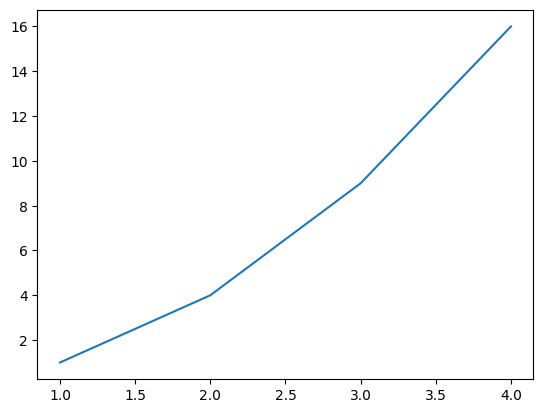

In [28]:
plt.plot([1,2,3,4],[1,4,9,16])
plt.show()

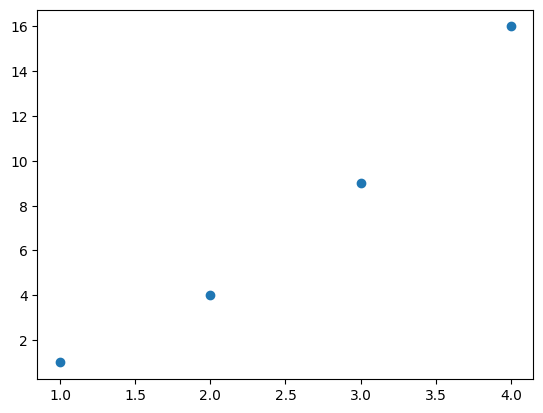

In [29]:
plt.plot([1,2,3,4],[1,4,9,16],"o")
plt.show()

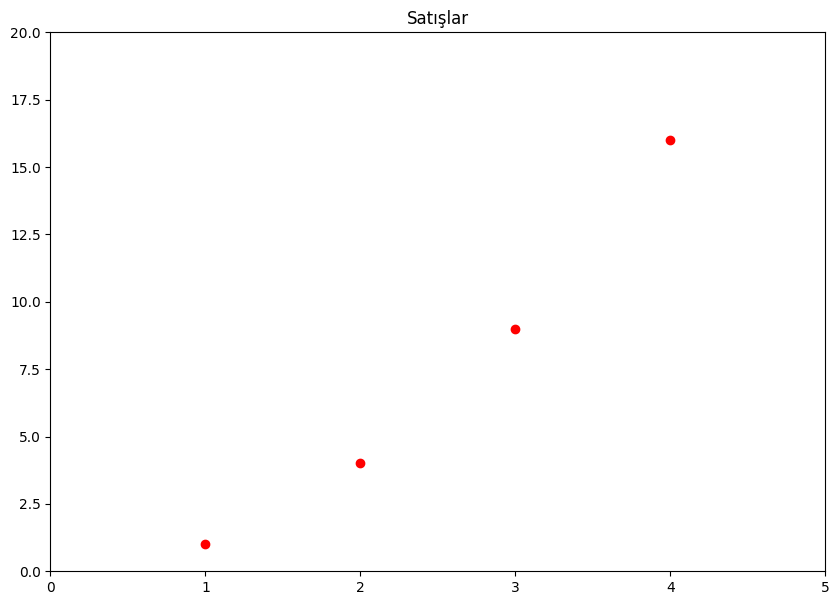

In [30]:
plt.figure(figsize=(10,7))
plt.axis([0,5,0,20])
plt.title('Satışlar')
plt.plot([1,2,3,4],[1,4,9,16],"ro")
plt.show()

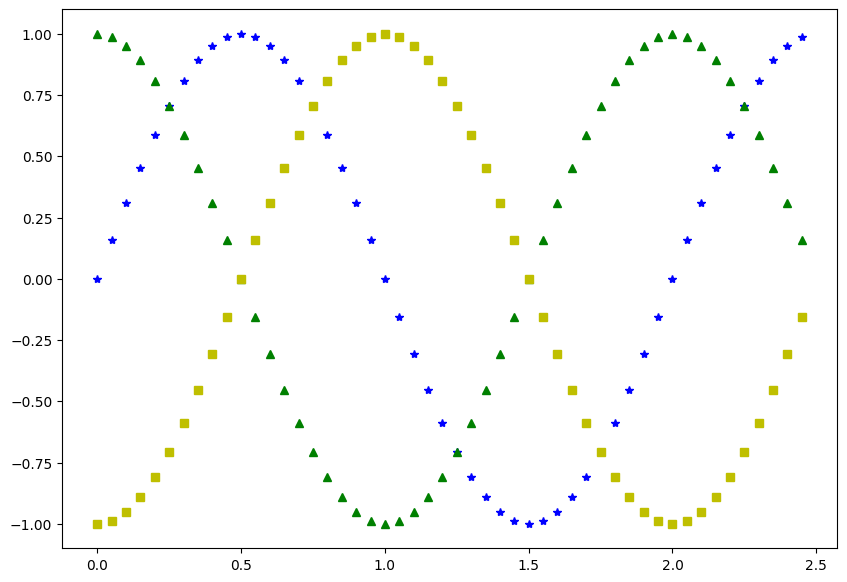

In [31]:
import numpy as np
plt.figure(figsize=(10,7))
t = np.arange(0,2.5,0.05)
y1 = np.sin(np.pi*t)
y2 = np.sin(np.pi*t+np.pi/2)
y3 = np.sin(np.pi*t-np.pi/2)
plt.plot(t,y1,'b*',t,y2,'g^',t,y3,'ys')
# plt.plot(t,y1,'b--',t,y2,'g',t,y3,'r-.')
plt.show()

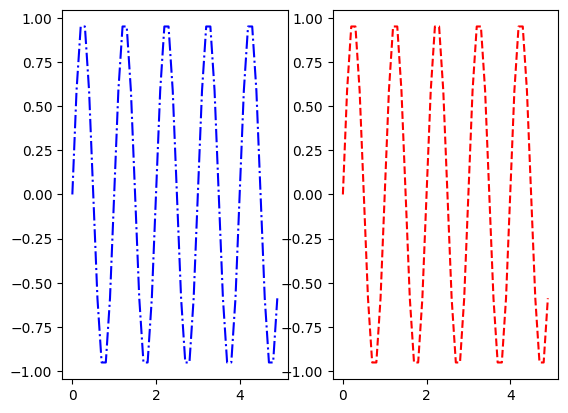

In [32]:
t = np.arange(0,5,0.1)
y1 = np.sin(2*np.pi*t)
y2 = np.sin(2*np.pi*t)

# plt.subplot(211)
plt.subplot(121)
plt.plot(t,y1,'b-.')


# plt.subplot(212)
plt.subplot(122)
plt.plot(t,y2,'r--')
plt.show()

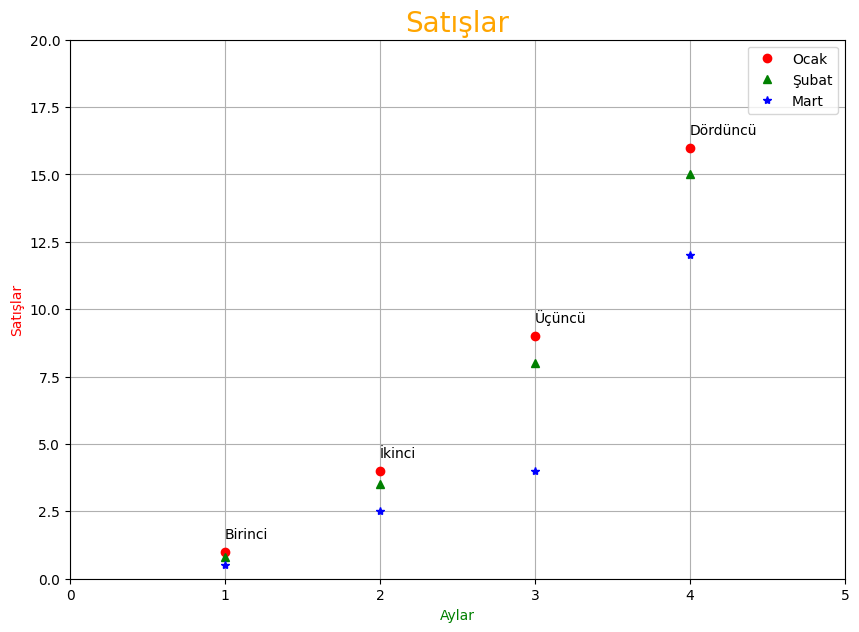

In [33]:
plt.figure(figsize=(10,7))
plt.axis([0,5,0,20])
plt.title('Satışlar', fontsize=20, fontname='Times New Roman', color="orange")

plt.text(1,1.5,'Birinci')
plt.text(2,4.5,'İkinci')
plt.text(3,9.5,'Üçüncü')
plt.text(4,16.5,'Dördüncü')

plt.xlabel('Aylar', color='green')
plt.ylabel('Satışlar',color='red')

plt.plot([1,2,3,4],[1,4,9,16],"ro")
plt.plot([1, 2, 3, 4], [0.8, 3.5, 8, 15], 'g^')
plt.plot([1, 2, 3, 4], [0.5, 2.5, 4, 12], 'b*')

plt.grid()
plt.legend(['Ocak', 'Şubat', 'Mart'], loc=1)

# plt.legend(['Aylar-Satışlar'])
# plt.savefig('grafik.png')
plt.savefig('grafik.pdf')

plt.show()

In [34]:
data = {'ocak': [1, 3, 4, 3, 5],
                'şubat': [2, 4, 5, 2, 4],
                'mart': [3, 2, 3, 1, 3]}


df = pd.DataFrame(data)
df

,ocak,şubat,mart
0,1,2,3
1,3,4,2
2,4,5,3
3,3,2,1
4,5,4,3


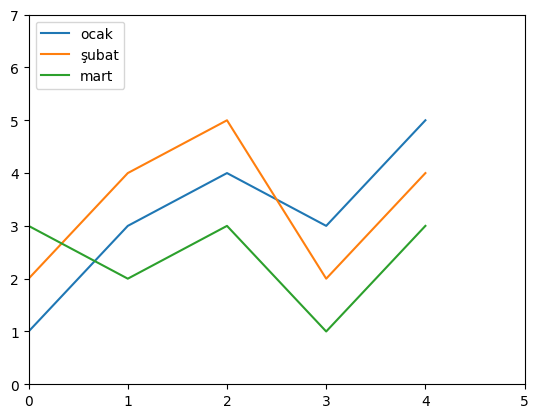

In [35]:
x = np.arange(5)
plt.axis([0, 5, 0, 7])
plt.plot(x, df)
plt.legend(data, loc = 2)
plt.show()

(array([18., 22., 17., 14., 29.]),
 array([ 2. , 21.2, 40.4, 59.6, 78.8, 98. ]),
 <BarContainer object of 5 artists>)

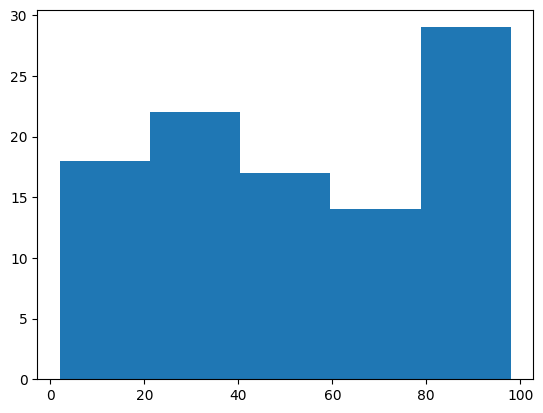

In [36]:
pop = np.random.randint(0, 100, 100)
plt.hist(pop, bins=5)

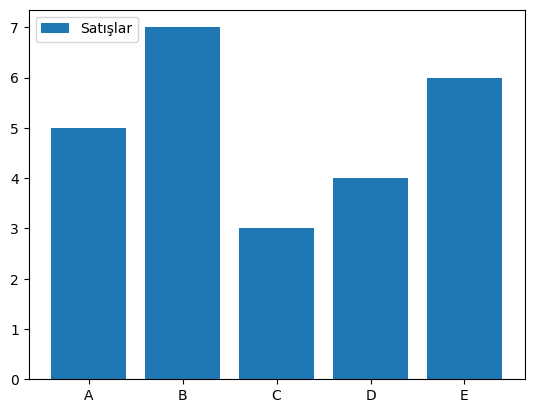

In [37]:
index = np.arange(5)
values1 = [5, 7, 3, 4, 6]
plt.bar(index, values1, label='Satışlar')
plt.xticks(index, ['A', 'B', 'C', 'D', 'E'])
plt.legend(loc=2)
plt.show()

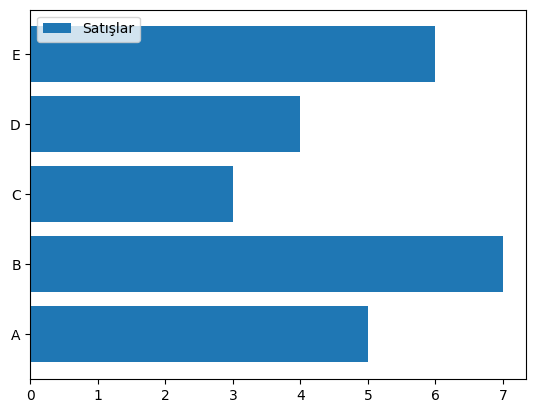

In [38]:
index = np.arange(5)
values1 = [5, 7, 3, 4, 6]
plt.barh(index, values1, label='Satışlar')
plt.yticks(index, ['A', 'B', 'C', 'D', 'E'])
plt.legend(loc=2)
plt.show()

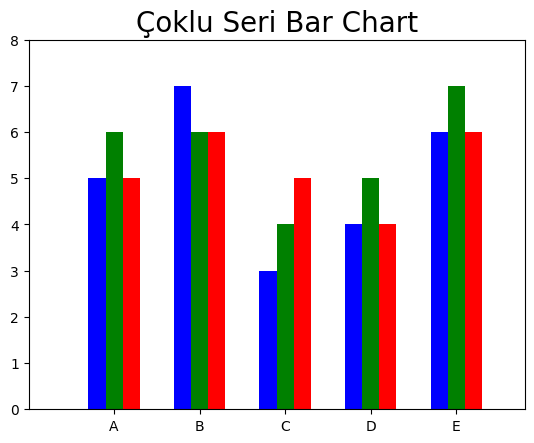

In [39]:
index = np.arange(5)
values1 = [5, 7, 3, 4, 6]
values2 = [6, 6, 4, 5, 7]
values3 = [5, 6, 5, 4, 6]
bw = 0.2
plt.axis([-0.8, 5, 0, 8])
plt.title('Çoklu Seri Bar Chart', fontsize=20)
plt.bar(index, values1, bw, color='b')
plt.bar(index+bw, values2, bw, color='g')
plt.bar(index+2*bw, values3, bw, color='r')

plt.xticks(index+1*bw, ['A', 'B', 'C', 'D', 'E'])
plt.show()

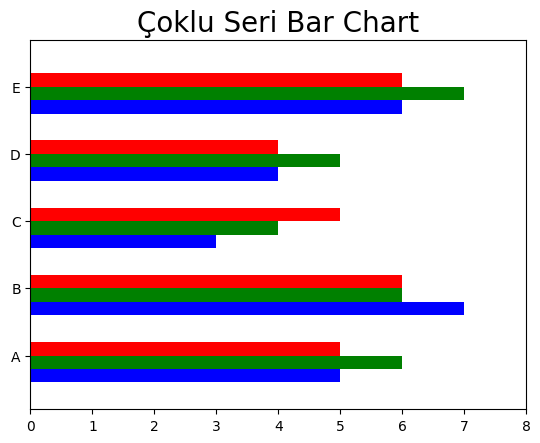

In [40]:
index = np.arange(5)
values1 = [5, 7, 3, 4, 6]
values2 = [6, 6, 4, 5, 7]
values3 = [5, 6, 5, 4, 6]
bw = 0.2
plt.axis([0, 8, -0.5, 5])
plt.title('Çoklu Seri Bar Chart', fontsize=20)
plt.barh(index, values1, bw, color='b')
plt.barh(index+bw, values2, bw, color='g')
plt.barh(index+2*bw, values3, bw, color='r')

plt.yticks(index+0.3, ['A', 'B', 'C', 'D', 'E'])
plt.show()

In [41]:
index = np.arange(5)
data = {'TV': [1, 3, 4, 3, 5],
        'Telefon': [2, 4, 5, 2, 4],
        'Tablet': [3, 2, 3, 1, 3]}

df = pd.DataFrame(data , index=["Ocak", "Şubat", "Mart", "Nisan", "Mayıs"])
df

,TV,Telefon,Tablet
Ocak,1,2,3
Şubat,3,4,2
Mart,4,5,3
Nisan,3,2,1
Mayıs,5,4,3


<Axes: >

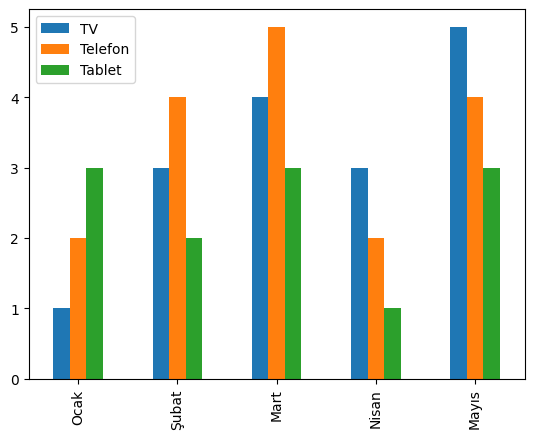

In [42]:
df.plot(kind='bar')

<Axes: >

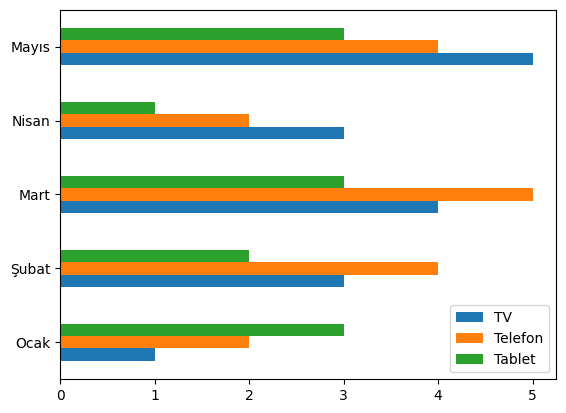

In [43]:
df.plot(kind='barh')

<Axes: >

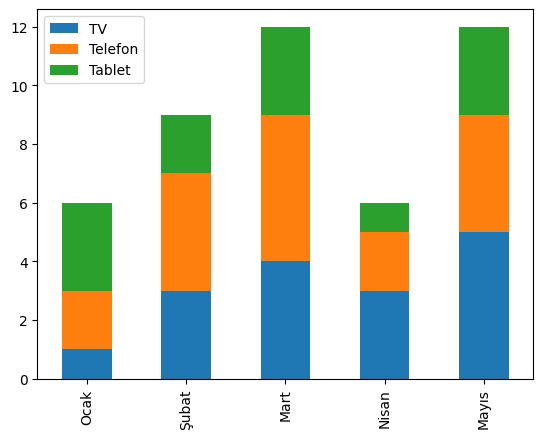

In [44]:
df.plot(kind='bar', stacked=True)

<Axes: >

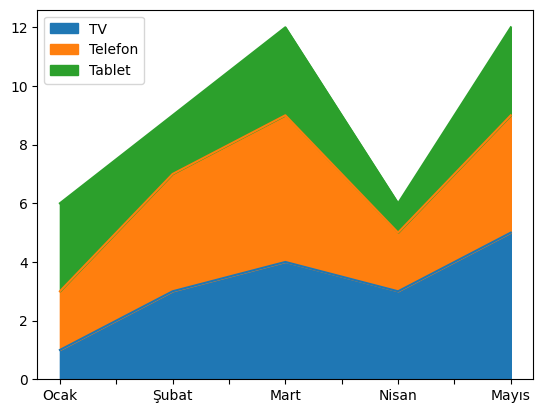

In [45]:
df.plot(kind='area')

<Axes: >

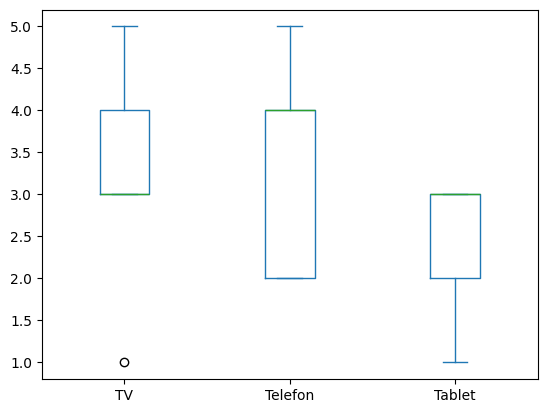

In [46]:
df.plot(kind='box')

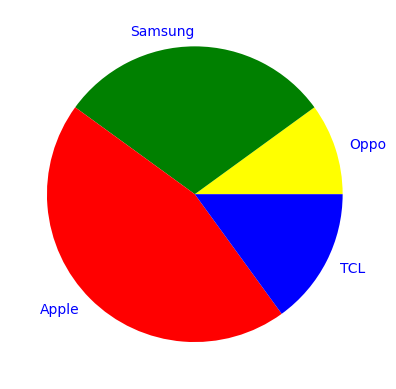

In [47]:
labels = ['Oppo', 'Samsung', 'Apple', 'TCL']
values = [10, 30, 45, 15]
colors = ['yellow', 'green', 'red', 'blue']

plt.pie(values, labels=labels, colors=colors, textprops={'color': "b"})
plt.show()

In [48]:
data = {'Ocak': [1, 3, 4, 3, 5],
        'Şubat': [2, 4, 5, 2, 4],
        'Mart': [3, 2, 3, 1, 3]}

df = pd.DataFrame(data , index=['Oppo', 'Samsung', 'Apple', 'TCL', 'Huawei'])
df

,Ocak,Şubat,Mart
Oppo,1,2,3
Samsung,3,4,2
Apple,4,5,3
TCL,3,2,1
Huawei,5,4,3


<Axes: ylabel='Ocak'>

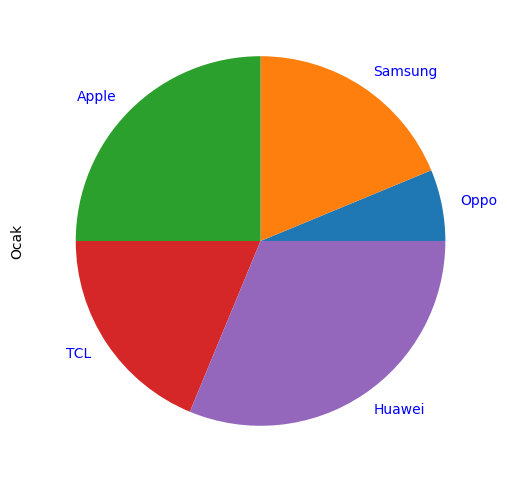

In [49]:
df['Ocak'].plot(kind='pie', figsize=(6, 6), textprops={'color': "b"})

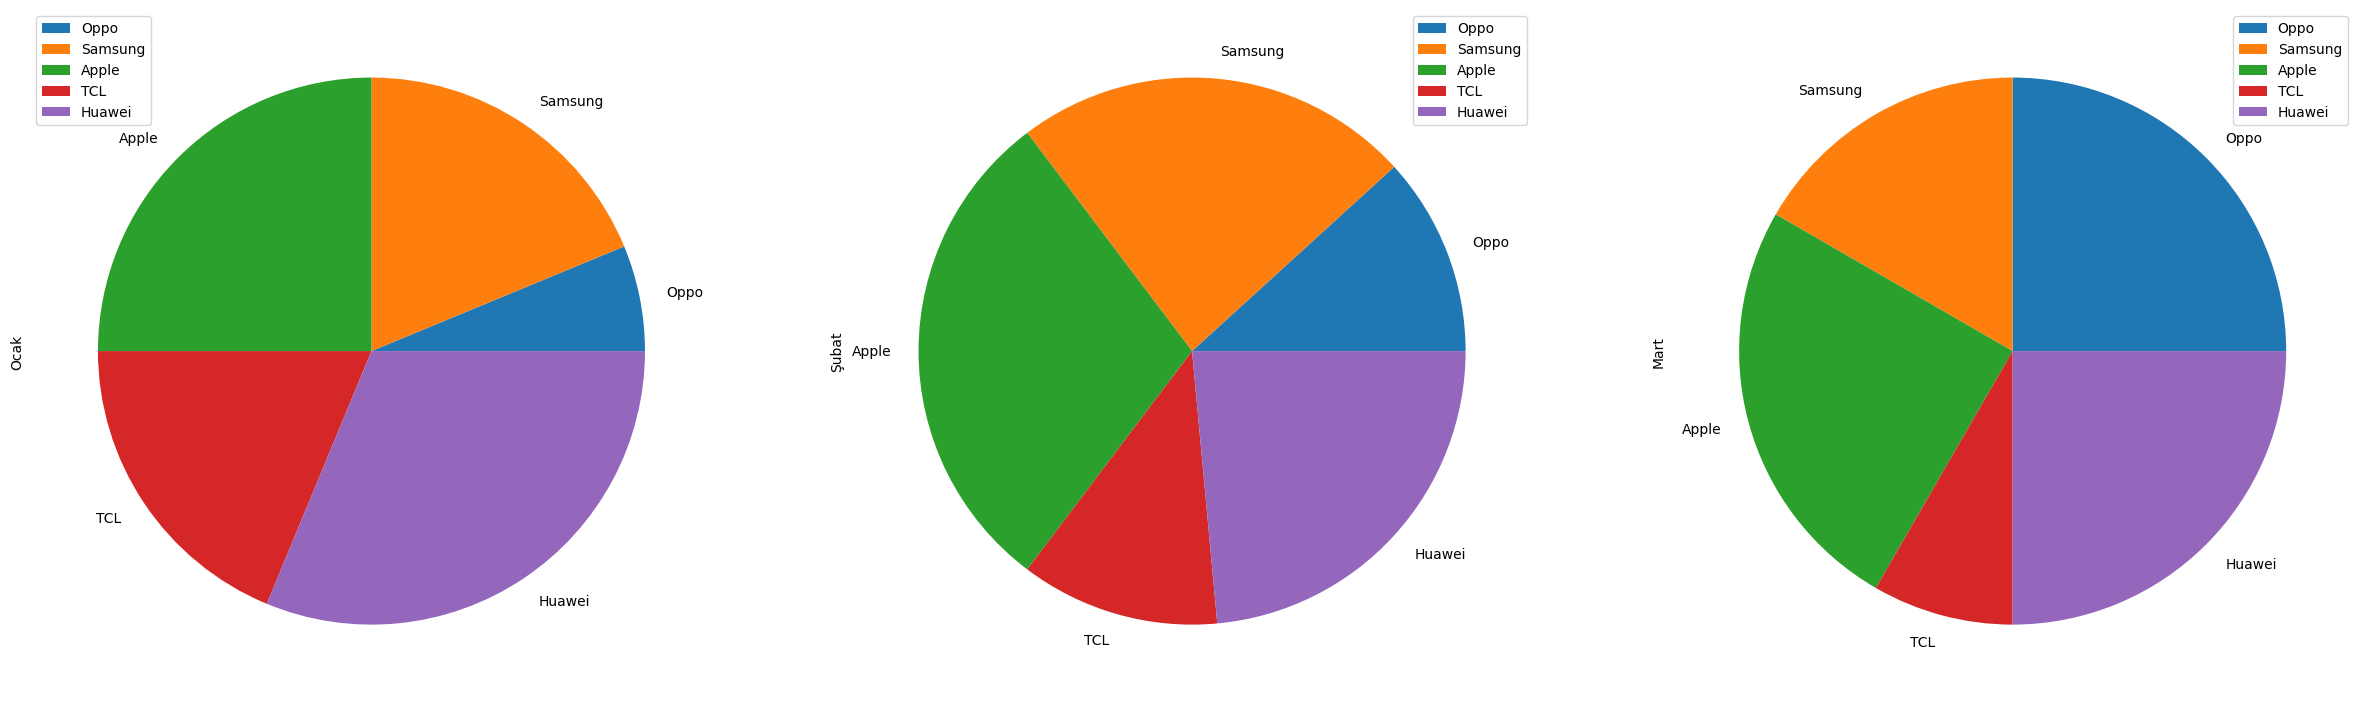

In [50]:
df.plot(kind="pie", subplots=True, figsize = (30,20))
plt.show()

# Seaborn

In [51]:
import seaborn as sns

In [52]:
# pip install seaborn

In [53]:
veri = sns.load_dataset("iris")
veri

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


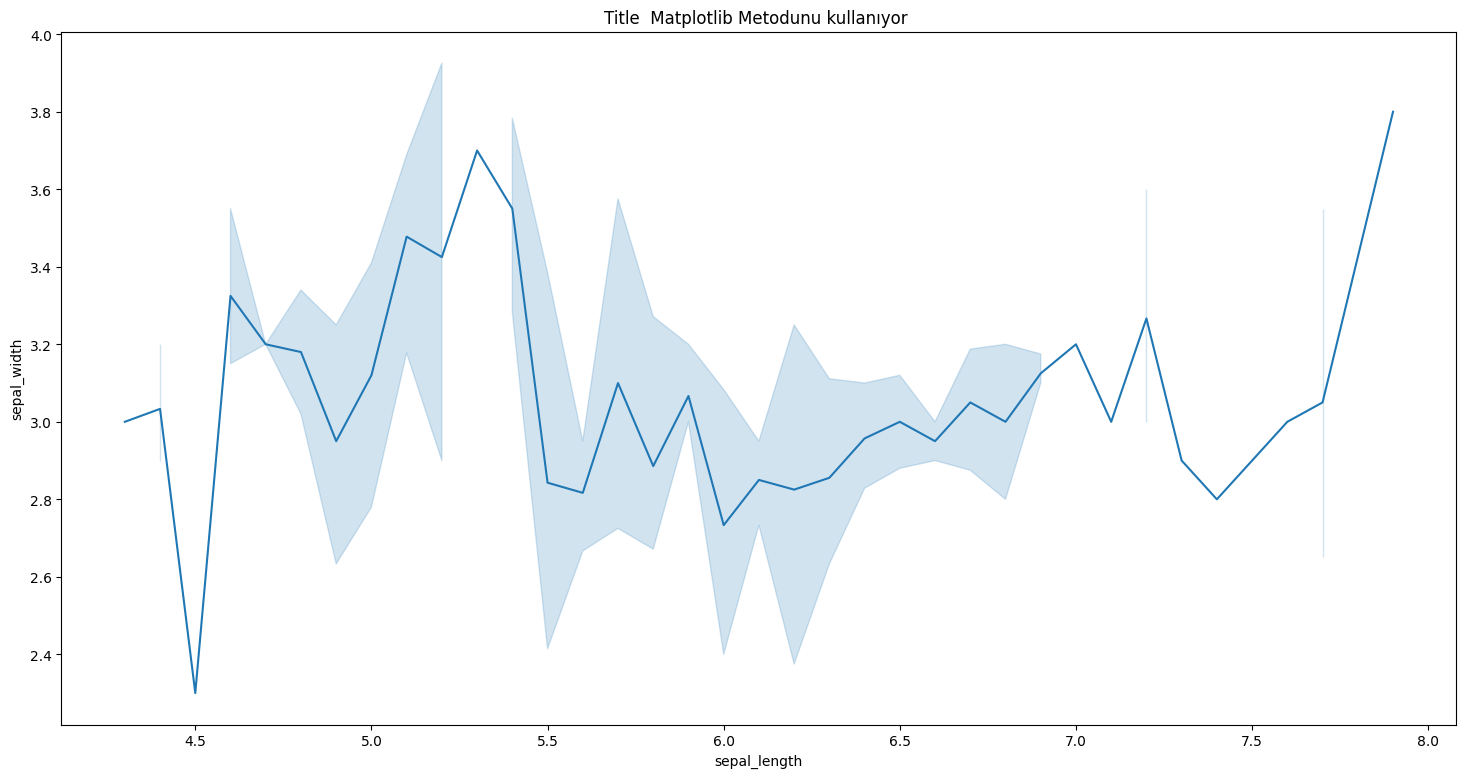

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 9))
plt.title('Title  Matplotlib Metodunu kullanıyor ')
sns.lineplot(x="sepal_length", y="sepal_width", data=veri)
plt.show()

In [55]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/zaferdemirkol/HerkesIcinYapayZeka/main/reklamlar.csv")
df

,Unnamed: 0,TV,radyo,gazete,satışlar,şehir,tür
0,0,230.1,37.8,69.2,22.1,İstanbul,Gıda
1,1,44.5,39.3,45.1,10.4,Ankara,Gıda
2,2,17.2,45.9,69.3,9.3,İzmir,Eşya
3,3,151.5,41.3,58.5,18.5,İzmir,Eşya
4,4,180.8,10.8,58.4,12.9,İstanbul,Gıda
...,...,...,...,...,...,...,...
195,195,38.2,3.7,13.8,7.6,İstanbul,Gıda
196,196,94.2,4.9,8.1,9.7,İstanbul,Eşya
197,197,177.0,9.3,6.4,12.8,İstanbul,Gıda
198,198,283.6,42.0,66.2,25.5,İstanbul,Eşya


In [56]:
df.drop("Unnamed: 0", axis=1, inplace=True)
df

,TV,radyo,gazete,satışlar,şehir,tür
0,230.1,37.8,69.2,22.1,İstanbul,Gıda
1,44.5,39.3,45.1,10.4,Ankara,Gıda
2,17.2,45.9,69.3,9.3,İzmir,Eşya
3,151.5,41.3,58.5,18.5,İzmir,Eşya
4,180.8,10.8,58.4,12.9,İstanbul,Gıda
...,...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,İstanbul,Gıda
196,94.2,4.9,8.1,9.7,İstanbul,Eşya
197,177.0,9.3,6.4,12.8,İstanbul,Gıda
198,283.6,42.0,66.2,25.5,İstanbul,Eşya


In [57]:
df.shape[0]

200

In [58]:
df.isnull().sum()

,0
TV,0
radyo,0
gazete,0
satışlar,0
şehir,0
tür,0


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TV        200 non-null    float64
 1   radyo     200 non-null    float64
 2   gazete    200 non-null    float64
 3   satışlar  200 non-null    float64
 4   şehir     200 non-null    object 
 5   tür       200 non-null    object 
dtypes: float64(4), object(2)
memory usage: 9.5+ KB


In [60]:
df.dtypes

,0
TV,float64
radyo,float64
gazete,float64
satışlar,float64
şehir,object
tür,object


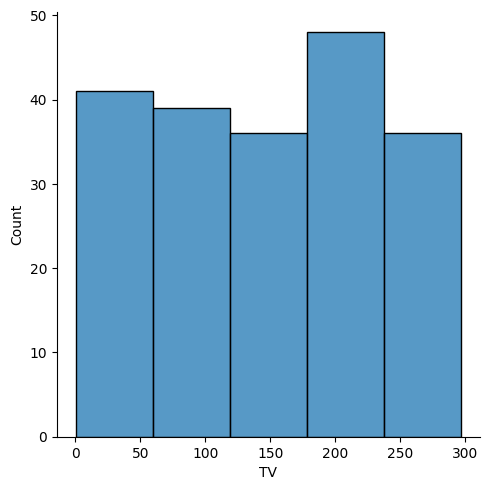

In [61]:
sns.displot(x=df['TV'], bins=5)

In [62]:
df["şehir"].value_counts()

,count
şehir,
İstanbul,73
İzmir,66
Ankara,61


<Axes: xlabel='şehir'>

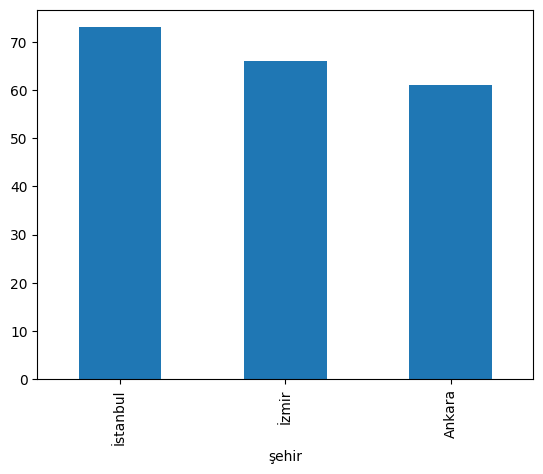

In [63]:
df["şehir"].value_counts().plot(kind="bar")

In [64]:
 df[df["şehir"] == "İstanbul"]

,TV,radyo,gazete,satışlar,şehir,tür
0,230.1,37.8,69.2,22.1,İstanbul,Gıda
4,180.8,10.8,58.4,12.9,İstanbul,Gıda
10,66.1,5.8,24.2,8.6,İstanbul,Eşya
14,204.1,32.9,46.0,19.0,İstanbul,Eşya
18,69.2,20.5,18.3,11.3,İstanbul,Gıda
...,...,...,...,...,...,...
193,166.8,42.0,3.6,19.6,İstanbul,Eşya
195,38.2,3.7,13.8,7.6,İstanbul,Gıda
196,94.2,4.9,8.1,9.7,İstanbul,Eşya
197,177.0,9.3,6.4,12.8,İstanbul,Gıda


# Ödev

https://raw.githubusercontent.com/zaferdemirkol/HerkesIcinYapayZeka/main/nba.csv

1- Dataframe e aktar

2- Son Beş kayıdı getir

3- Sütunlarını getir

4- Son 3 kayıdın "Salary", "Team", "Name" alanalarını getirin

5-"Sport" isminde yeni bir sütun oluşturun ve bu sütunun bütün değerlerini "Basketball" yapın


6- "league" isminde yeni bir sütun oluşturun ve bütün değerlerini "National Basketball Association" yapın


7- "Weight in Kilograms" isminde bir sütun oluşturun ve bu sütunun değerlerini "Weight" sütunlarını 0.453 ile çarpılmış olarak ekleyin


8-NaN verilerini çıkarın


9-NaN Verilerini 0 ile doldur

10- "Name", "Age" ve "Salary" e göre sıralama yap.

In [66]:
pivot_table = df.pivot_table(index='şehir',
                             columns='tür',
                             values='TV',
                             aggfunc='mean')
print(pivot_table)

tür             Eşya        Gıda
şehir                           
Ankara    145.196154  162.157143
İstanbul  144.409375  158.741463
İzmir     148.078947  114.335714


In [67]:
pivot_table["Eşya"]["Ankara"]

np.float64(145.19615384615383)

In [68]:
df[df["TV"] > 200]

,TV,radyo,gazete,satışlar,şehir,tür
0,230.1,37.8,69.2,22.1,İstanbul,Gıda
11,214.7,24.0,4.0,17.4,İzmir,Eşya
14,204.1,32.9,46.0,19.0,İstanbul,Eşya
17,281.4,39.6,55.8,24.4,İzmir,Eşya
20,218.4,27.7,53.4,18.0,İstanbul,Eşya
...,...,...,...,...,...,...
184,253.8,21.3,30.0,17.6,Ankara,Eşya
185,205.0,45.1,19.6,22.6,İzmir,Eşya
188,286.0,13.9,3.7,15.9,Ankara,Gıda
198,283.6,42.0,66.2,25.5,İstanbul,Eşya


<Figure size 2000x1400 with 0 Axes>

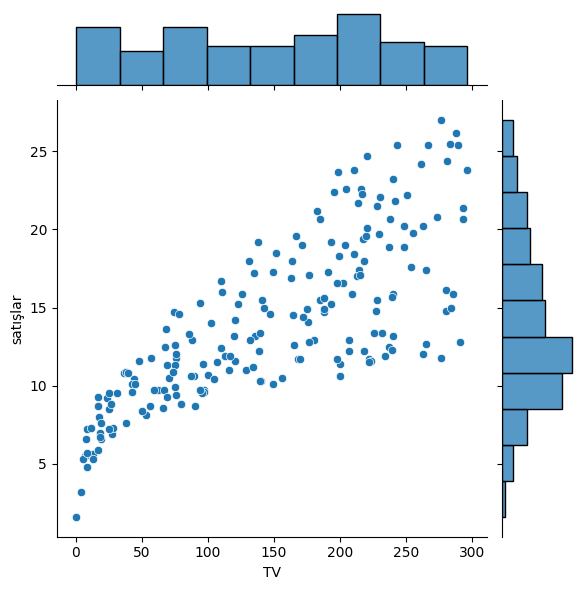

In [69]:
# sns.lineplot(x="sepal_length", y="sepal_width", data=veri)

plt.figure(figsize = (20, 14))
sns.jointplot(x = df['TV'], y = df['satışlar'], kind = 'scatter')

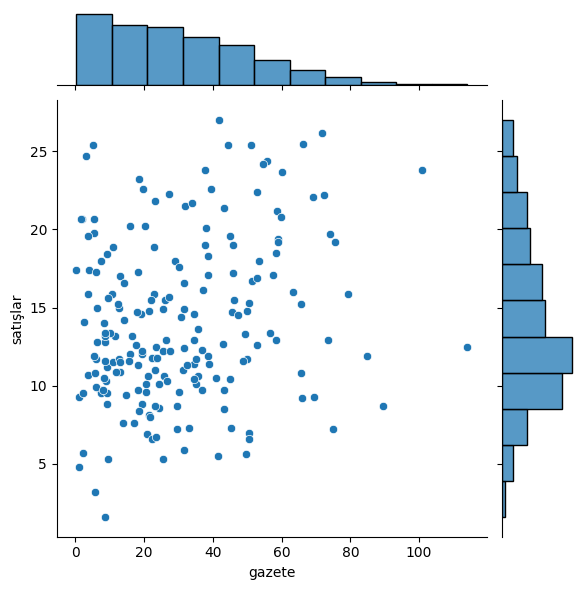

In [70]:
sns.jointplot(x = df['gazete'], y = df['satışlar'], kind = 'scatter')

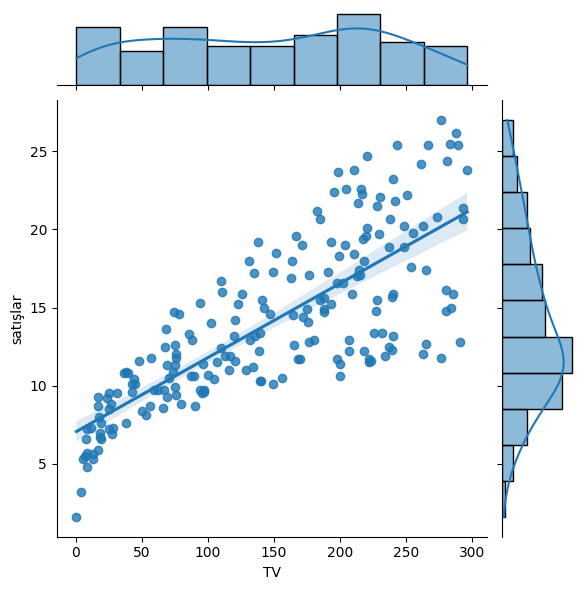

In [71]:
sns.jointplot(x = df['TV'], y = df['satışlar'], kind = 'reg')

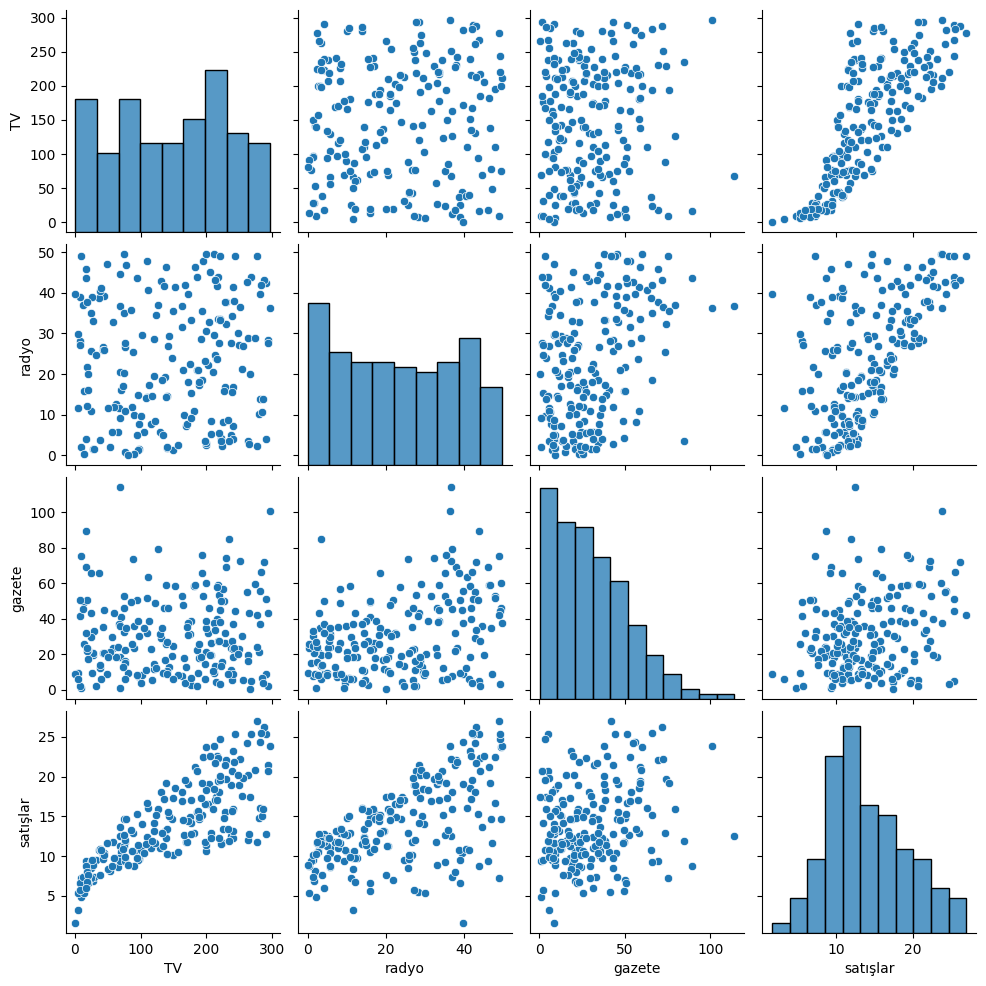

In [72]:
sns.pairplot(df)